### Aplicação de Machine Learning nos dados tratados ###


Importação das bibliotecas

In [1]:
# coding=UTF-8
# encoding: iso-8859-1
# encoding: win-1252
#encoding: utf-8
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importando o arquivo em excel já com arquivos tratados

In [2]:
arquivo = pd.read_excel('DadosTratados.xlsx', encoding='utf8')

<b><i>Utilização do método Arvore de Decisão<i><b>

Importação da biblioteca de SKLearn de Tree Decision

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
X = arquivo.drop('Caso',axis=1)
y = arquivo['Caso']

Definição de variaveis de aprendizagem

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Text(0, 0.5, 'Taxa de Erro')

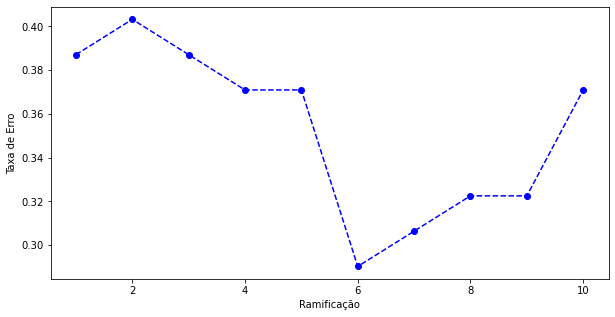

In [6]:
error_rate = []

for i in range(1,11):
    dectree = DecisionTreeClassifier(max_depth=i)
    dectree.fit(X_train, y_train)
    pred = dectree.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,11), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Ramificação')
plt.ylabel('Taxa de Erro')

Após identificação da melhor ramificação ou profundidade

In [7]:
dectree = DecisionTreeClassifier(max_depth=6)
dectree.fit(X_train, y_train)
pred = dectree.predict(X_test)

Importação das bibliotecas de avaliação de resultados (Classificação e Matriz de confusão)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.44      0.67      0.53        12
           2       0.72      0.72      0.72        25
           3       0.89      0.68      0.77        25

    accuracy                           0.69        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.74      0.69      0.71        62



In [10]:
print(confusion_matrix(y_test, pred))

[[ 8  4  0]
 [ 5 18  2]
 [ 5  3 17]]


Fazendo os mesmos procedimentos para <i>Random Forest<i>

In [11]:
from sklearn.ensemble import RandomForestClassifier

Text(0, 0.5, 'Taxa de Erro')

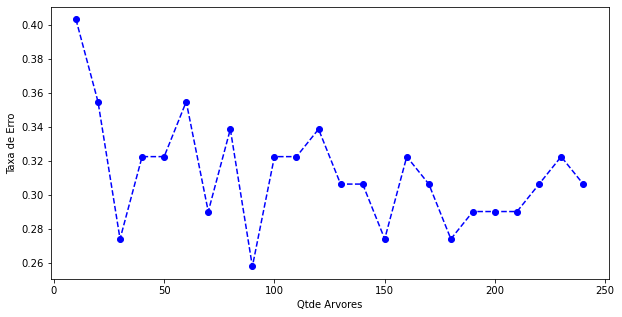

In [12]:
error_rate = []

for i in range(10,250,10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    pred_forest = rfc.predict(X_test)
    error_rate.append(np.mean(pred_forest != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(10,250,10), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Qtde Arvores')
plt.ylabel('Taxa de Erro')

In [13]:
rfc = RandomForestClassifier(n_estimators=90)
rfc.fit(X_train, y_train)
pred_forest = rfc.predict(X_test)

In [14]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           1       0.56      0.42      0.48        12
           2       0.54      0.76      0.63        25
           3       0.89      0.64      0.74        25

    accuracy                           0.65        62
   macro avg       0.66      0.61      0.62        62
weighted avg       0.68      0.65      0.65        62



In [15]:
print(confusion_matrix(y_test, pred_forest))

[[ 5  7  0]
 [ 4 19  2]
 [ 0  9 16]]


### <i>Utilição de melhores paramêtros<i>

In [16]:
arquivo.head(5)

,Caso,Idade,Renda,Sexo,Estado Civil,Filhos,Escolaridade,Escolaridade mãe,Escolaridade pai,Idioma,...,Satisfação,Relevância para a carreira,Relevância vida pessoal,Dificuldade de aprendizado,Nivelamento,Dificuldade de conciliar a carga horaria,Funcionalidades do curso/Horarios da aula,Metodologia/Integração,Disciplina/Relacionamento com o professor,Satisfação com o IE
0,1,24,1,1,1,1,1,1,1,1,...,1,1,6,1,1,1,1,1,1,1
1,1,21,2,1,1,1,1,2,1,1,...,2,1,1,2,2,2,1,1,1,2
2,1,47,2,2,2,2,6,3,2,1,...,2,2,2,1,3,1,2,2,1,2
3,1,24,3,2,1,1,1,2,3,1,...,2,1,1,1,3,1,2,1,2,1
4,1,20,1,1,1,1,1,1,4,1,...,3,1,1,1,3,1,3,3,2,3


In [17]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Caso                                       309 non-null    int64
 1   Idade                                      309 non-null    int64
 2   Renda                                      309 non-null    int64
 3   Sexo                                       309 non-null    int64
 4   Estado Civil                               309 non-null    int64
 5   Filhos                                     309 non-null    int64
 6   Escolaridade                               309 non-null    int64
 7   Escolaridade mãe                           309 non-null    int64
 8   Escolaridade pai                           309 non-null    int64
 9   Idioma                                     309 non-null    int64
 10  Idade que fez o curso                      309 non

In [18]:
arquivo.describe()

,Caso,Idade,Renda,Sexo,Estado Civil,Filhos,Escolaridade,Escolaridade mãe,Escolaridade pai,Idioma,...,Satisfação,Relevância para a carreira,Relevância vida pessoal,Dificuldade de aprendizado,Nivelamento,Dificuldade de conciliar a carga horaria,Funcionalidades do curso/Horarios da aula,Metodologia/Integração,Disciplina/Relacionamento com o professor,Satisfação com o IE
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.00000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,2.126214,23.566343,3.016181,1.495146,1.077670,1.042071,1.595469,2.456311,3.796117,1.391586,...,1.980583,1.980583,2.747573,2.12945,2.355987,2.964401,2.252427,2.061489,2.417476,2.317152
std,0.729877,4.245659,1.347098,0.507229,0.323013,0.269999,1.222667,1.685172,2.129078,1.028203,...,0.897116,1.659177,2.038836,1.13507,1.014251,1.349132,1.010193,0.886097,1.420108,1.070440
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,21.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,2.000000,23.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,1.000000,...,2.000000,1.000000,2.000000,2.00000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,25.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,5.000000,1.000000,...,2.000000,2.000000,6.000000,3.00000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000
max,3.000000,51.000000,6.000000,3.000000,4.000000,3.000000,6.000000,8.000000,9.000000,7.000000,...,5.000000,6.000000,6.000000,5.00000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000


In [25]:
arquivo2 = pd.DataFrame(arquivo, columns=['Caso','Idade', 'Renda', 'Estado Civil', 'Filhos', 'Idioma', 'Escolaridade', 'Metodologia/Integração',
                                          'Dificuldade de aprendizado', 'Sexo', 'Valor da mensalidade'])

In [26]:
arquivo2.head(5)

,Caso,Idade,Renda,Estado Civil,Filhos,Idioma,Escolaridade,Metodologia/Integração,Dificuldade de aprendizado,Sexo,Valor da mensalidade
0,1,24,1,1,1,1,1,1,1,1,1
1,1,21,2,1,1,1,1,1,2,1,2
2,1,47,2,2,2,1,6,2,1,2,3
3,1,24,3,1,1,1,1,1,1,2,4
4,1,20,1,1,1,1,1,3,1,1,1


In [27]:
arquivo['Metodologia/Integração']
#print(arquivo.columns)

0      1
1      1
2      2
3      1
4      3
      ..
304    2
305    2
306    3
307    2
308    2
Name: Metodologia/Integração, Length: 309, dtype: int64

In [28]:
X1 = arquivo2.drop('Caso', axis=1)
y1 = arquivo2['Caso']

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

Text(0, 0.5, 'Taxa de Erro')

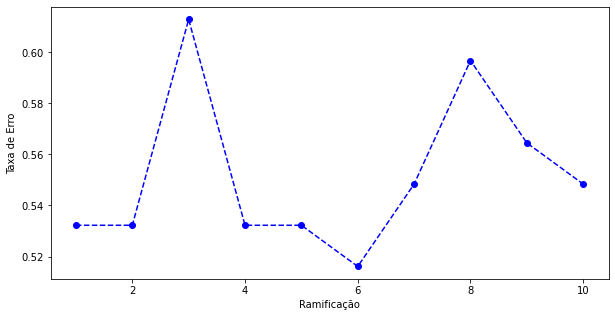

In [30]:
error_rate = []

for i in range(1,11):
    dectree = DecisionTreeClassifier(max_depth=i)
    dectree.fit(X1_train, y1_train)
    pred = dectree.predict(X1_test)
    error_rate.append(np.mean(pred != y1_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,11), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Ramificação')
plt.ylabel('Taxa de Erro')

In [31]:
dectree = DecisionTreeClassifier(max_depth=6)
dectree.fit(X1_train, y1_train)
pred = dectree.predict(X1_test)

In [32]:
print(classification_report(y1_test, pred))

              precision    recall  f1-score   support

           1       0.29      0.15      0.20        13
           2       0.59      0.66      0.62        29
           3       0.35      0.40      0.37        20

    accuracy                           0.47        62
   macro avg       0.41      0.40      0.40        62
weighted avg       0.45      0.47      0.45        62



In [33]:
print(confusion_matrix(y1_test, pred))

[[ 2  4  7]
 [ 2 19  8]
 [ 3  9  8]]


Text(0, 0.5, 'Taxa de Erro')

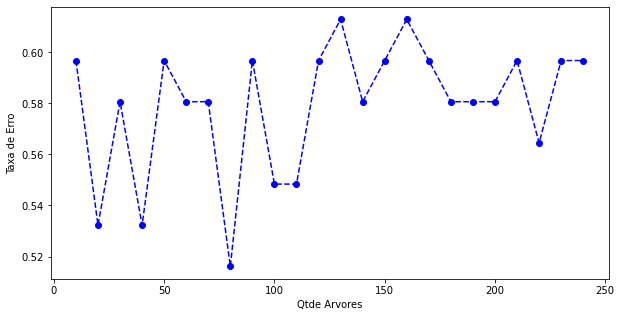

In [34]:
error_rate = []

for i in range(10,250,10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X1_train, y1_train)
    pred_forest = rfc.predict(X1_test)
    error_rate.append(np.mean(pred_forest != y1_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(10,250,10), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Qtde Arvores')
plt.ylabel('Taxa de Erro')

In [35]:
rfc = RandomForestClassifier(n_estimators=800)
rfc.fit(X1_train, y1_train)
pred_forest = rfc.predict(X1_test)

In [36]:
print(classification_report(y1_test, pred_forest))

              precision    recall  f1-score   support

           1       0.20      0.08      0.11        13
           2       0.49      0.59      0.53        29
           3       0.36      0.40      0.38        20

    accuracy                           0.42        62
   macro avg       0.35      0.35      0.34        62
weighted avg       0.39      0.42      0.39        62



In [37]:
print(confusion_matrix(y1_test, pred_forest))

[[ 1  8  4]
 [ 2 17 10]
 [ 2 10  8]]
